## Modelagem e Inferência Estatística

In [108]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf 

### Regressão linear

#### Modelos lineares

##### Statsmodel

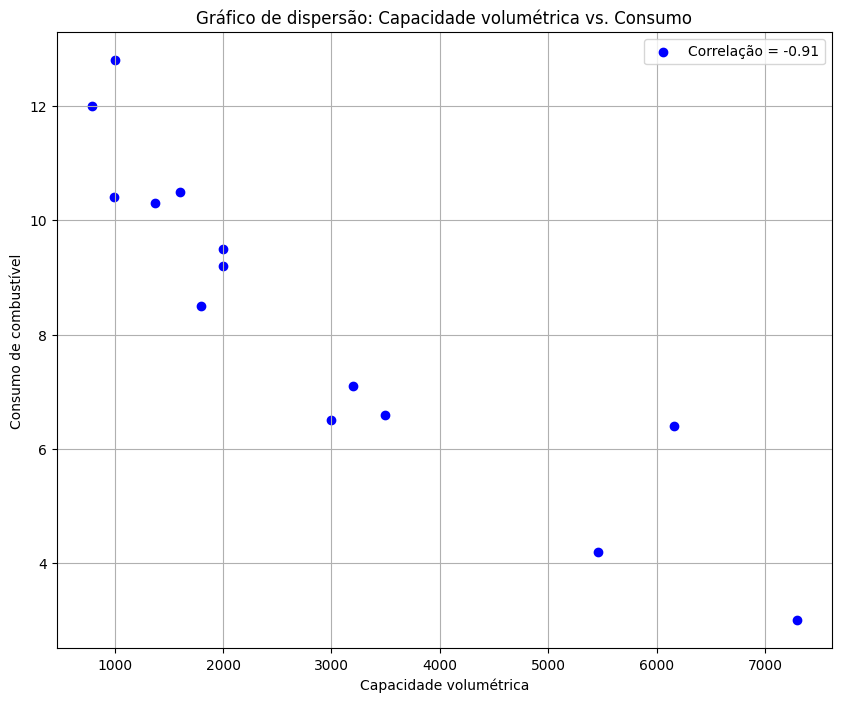

In [109]:
# Carregar dataset
df = pd.read_csv('data/cars_vertical.csv', delimiter=';', encoding='utf-8')

# Selecionar atributos
x = df['cap_vol']
y = df['consumo']

# Visualização dos dados
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue' , label=f'Correlação = {np.round(np.corrcoef(x, y)[0,1], 2)}')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo de combustível') 
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Consumo')
plt.legend()
plt.grid(True)
plt.show()

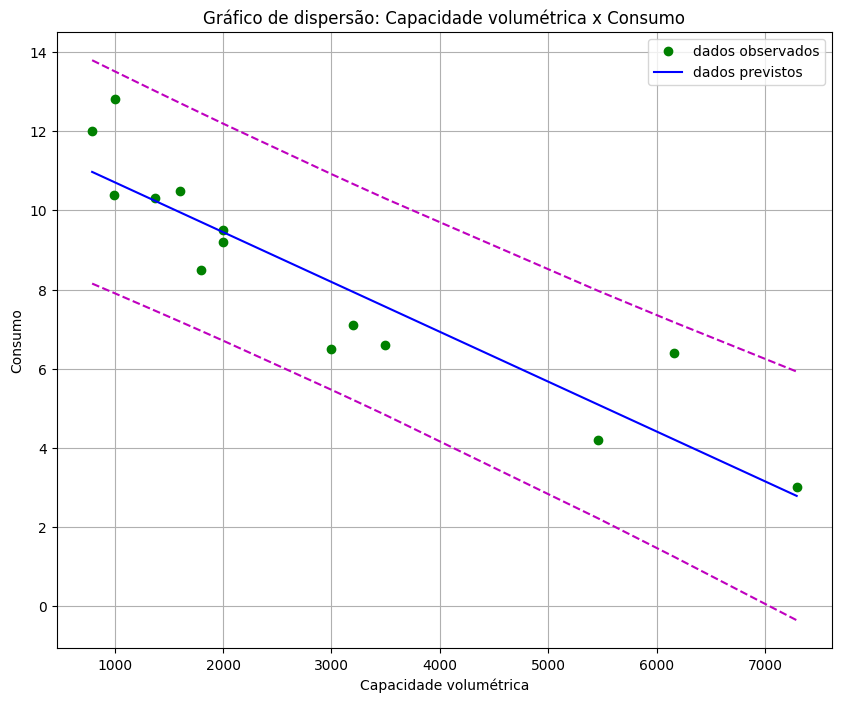

In [110]:
# Treinar modelo linear
x_ = sm.add_constant(x)
modelo_linear = sm.OLS(y, x_).fit()

# Obter parâmetros da reta
b = modelo_linear.params
b0 = b[0]        
b1 = b[1]         

# Obter parâmetros do desvio padrão
sb = modelo_linear.bse       
sb0 = sb[0]          
sb1 = sb[1]         

# Coeficiente de determinação
r2 = modelo_linear.rsquared

# Valores previstos pelo modelo linear
yhat = modelo_linear.predict(x_)  

# Parâmetros considerando intervalo de confiança de 95%
a = modelo_linear.conf_int(alpha=0.05, cols=None)

# Obter o intervalo de previsão
pred_ols = modelo_linear.get_prediction()
iv_l = pred_ols.summary_frame()['obs_ci_lower']
iv_u = pred_ols.summary_frame()['obs_ci_upper']

# Visualização dos resultados
plt.figure(figsize=(10, 8))
plt.plot(x_['cap_vol'], y, 'go', label='dados observados')
plt.plot(x_['cap_vol'], yhat, 'b-', label='dados previstos')
plt.plot(x_['cap_vol'], iv_u, 'm--')
plt.plot(x_['cap_vol'], iv_l, 'm--')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo')
plt.title('Gráfico de dispersão: Capacidade volumétrica x Consumo')
plt.legend(loc="best")
plt.grid(True)
plt.show();

#print(f'Parâmetros:\nb0: {b0} / b1: {b1}\n')
#print(f'Desvio padrão:\nsb0: {sb0} / sb1: {sb1}\n')
#print(f'Coeficiente de determinação:\nR2:{r2}\n')
#print(f'Parâmetros para intervalo de confiança 95%:\n{a}\n')
#print(f'Valores previstos:\n{yhat}\n')
#print(f'Valores limite inferior:\n{iv_l}\n')
#print(f'Valores limite superior:\n{iv_u}\n')
#print(modelo_linear.summary())

##### Sklearn

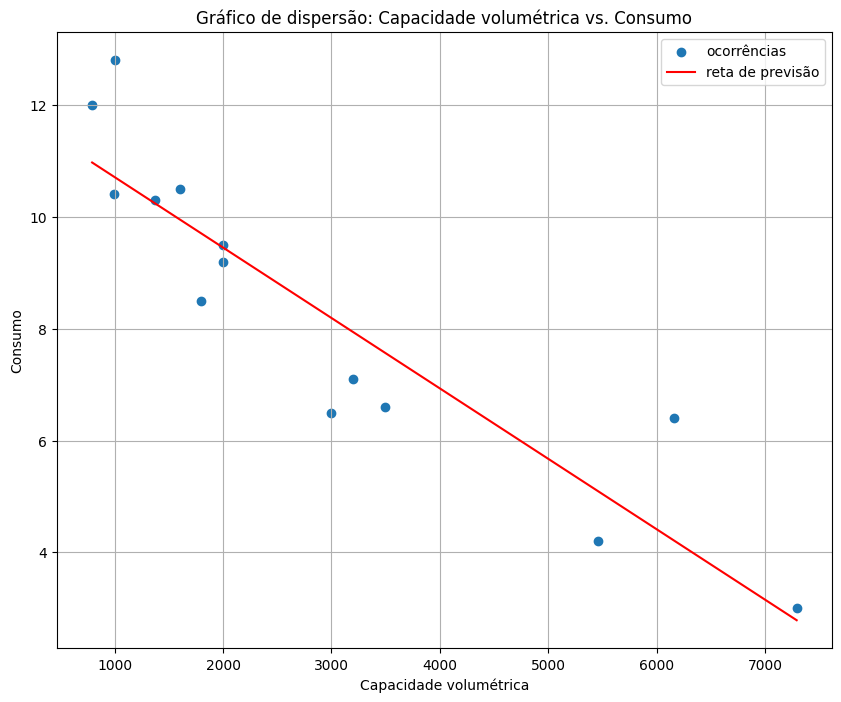

In [111]:
# Carregar dataset
df = pd.read_csv('data/cars_vertical.csv', delimiter=';', encoding='utf-8')

# Selecionar features e target
x = df[['cap_vol']]
y = df[['consumo']]

# Separar train/test
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 1, train_size = 0.8)
    
# Treinar modelo
modelo_linear = LinearRegression().fit(x, y)

# Prever valores
yhat = modelo_linear.predict(x)
    
# Parâmetros da reta
coeficiente_linear = modelo_linear.intercept_
coeficiente_angular = modelo_linear.coef_

# Coeficiente de determinação
r2 = modelo_linear.score(x, y)
    
# Cálculo de erros
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(y, yhat)
RMSE = np.sqrt(MSE)

# Visualização dos resultados
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label = 'ocorrências')
plt.plot(x, yhat, color = 'red', label = 'reta de previsão')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo')
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Consumo')
plt.legend(loc="best")
plt.grid(True)
plt.show();

#print('Regressão linear Sklearn')
#print("MAE = {:0.4f}".format(MAE))
#print("MSE = {:0.4f}".format(MSE))
#print("RMSE = {:0.4f}".format(RMSE))
#print(f'Coeficiente linear: {coeficiente_linear}')
#print(f'Coeficiente angular: {coeficiente_angular}')
#print(f'Coef. Determinação: {r2}')

#### Modelos não lineares

##### Statsmodel

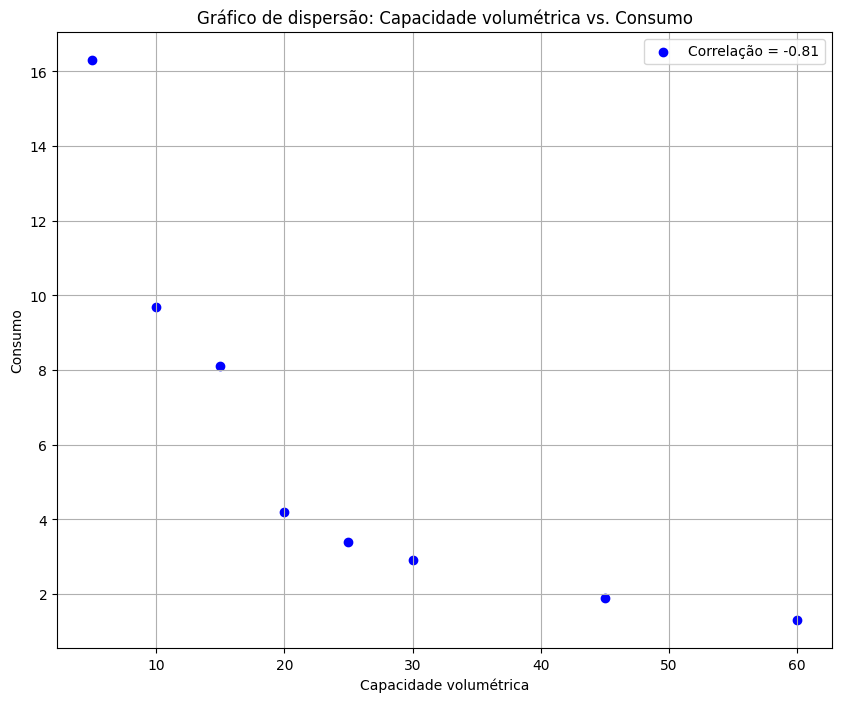

In [112]:
# Criar DataFrame
x = [5, 10, 15, 20, 25, 30, 45, 60]
y = [16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3]
df = pd.DataFrame(list(zip(x, y)), columns =['cap_vol','consumo'])

# Selecionar atributos
x = df['cap_vol']
y = df['consumo']

# Visualização dos dados
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color = 'blue', marker = 'o', label=f'Correlação = {np.round(np.corrcoef(x, y)[0,1], 2)}')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo')
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Consumo')
plt.legend(loc='best')
plt.grid(True)
plt.show();

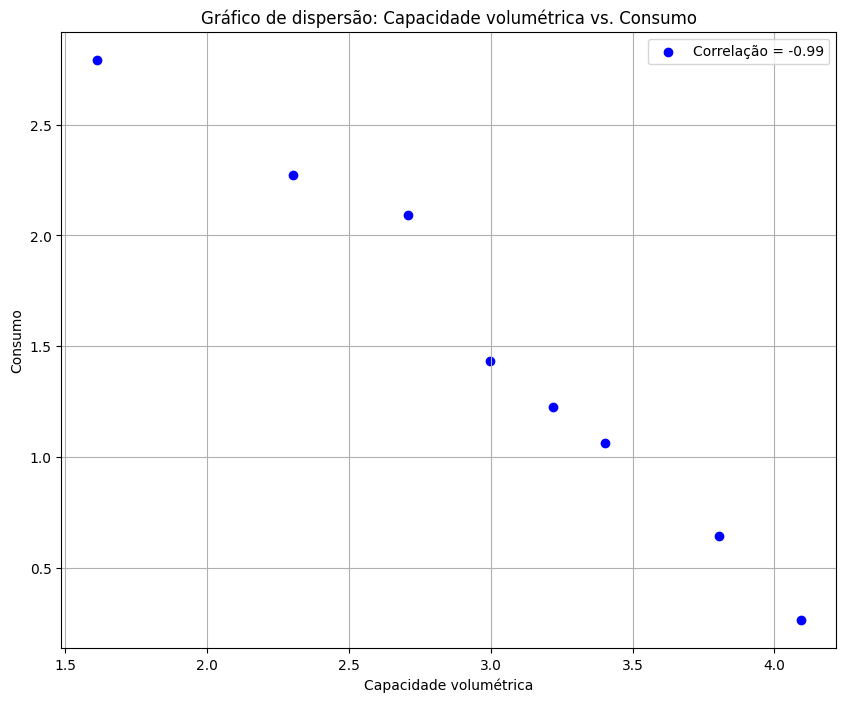

In [113]:
# Linearização utilizando log log
vtx = np.log(x)
vty = np.log(y)

# Visualização dos dados linearizados
plt.figure(figsize=(10, 8))
plt.scatter(vtx, vty, color = 'blue', marker = 'o', label=f'Correlação = {np.round(np.corrcoef(vtx, vty)[0,1], 2)}')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo')
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Consumo')
plt.legend(loc='best')
plt.grid(True)
plt.show();

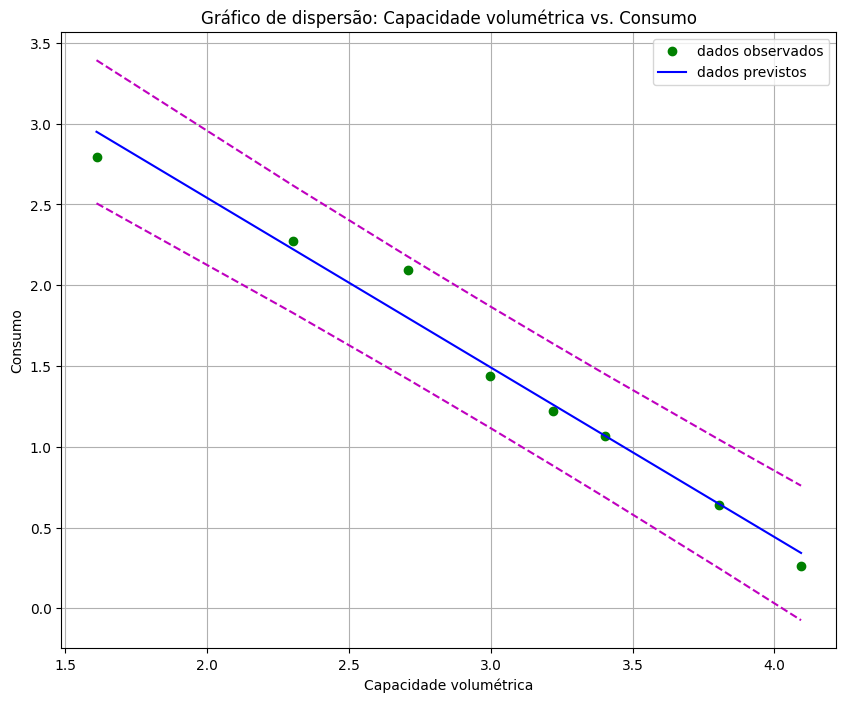

In [114]:
# Treinar modelo linearizado
vtx_ = sm.add_constant(vtx)
modelo_linearizado = sm.OLS(vty, vtx_).fit()

# Obter parâmetros da reta
b = modelo_linearizado.params
b0 = b[0]        
b1 = b[1]         

# Obter parâmetros do desvio padrão
sb = modelo_linearizado.bse       
sb0 = sb[0]          
sb1 = sb[1]         

# Coeficiente de determinação
r2 = modelo_linearizado.rsquared

# Valores previstos pelo modelo linearizado
yhat = modelo_linearizado.predict(vtx_)  

# Parâmetros considerando intervalo de confiança de 95%
a = modelo_linearizado.conf_int(alpha=0.05, cols=None)

# Obter o intervalo de previsão
pred_ols = modelo_linearizado.get_prediction()
iv_l = pred_ols.summary_frame()['obs_ci_lower']
iv_u = pred_ols.summary_frame()['obs_ci_upper']

# Visualização dos resultados
plt.figure(figsize=(10, 8))
plt.plot(vtx_['cap_vol'], vty, 'go', label='dados observados')
plt.plot(vtx_['cap_vol'], yhat, 'b-', label='dados previstos')
plt.plot(vtx_['cap_vol'], iv_u, 'm--')
plt.plot(vtx_['cap_vol'], iv_l, 'm--')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo')
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Consumo')
plt.legend(loc="best")
plt.grid(True)
plt.show();

#print(f'Parâmetros:\nb0: {b0} / b1: {b1}\n')
#print(f'Desvio padrão:\nsb0: {sb0} / sb1: {sb1}\n')
#print(f'Coeficiente de determinação:\nR2:{r2}\n')
#print(f'Parâmetros para intervalo de confiança 95%:\n{a}\n')
#print(f'Valores previstos:\n{yhat}\n')
#print(f'Valores limite inferior:\n{iv_l}\n')
#print(f'Valores limite superior:\n{iv_u}\n')
#print(modelo_linearizado.summary())

##### Sklearn

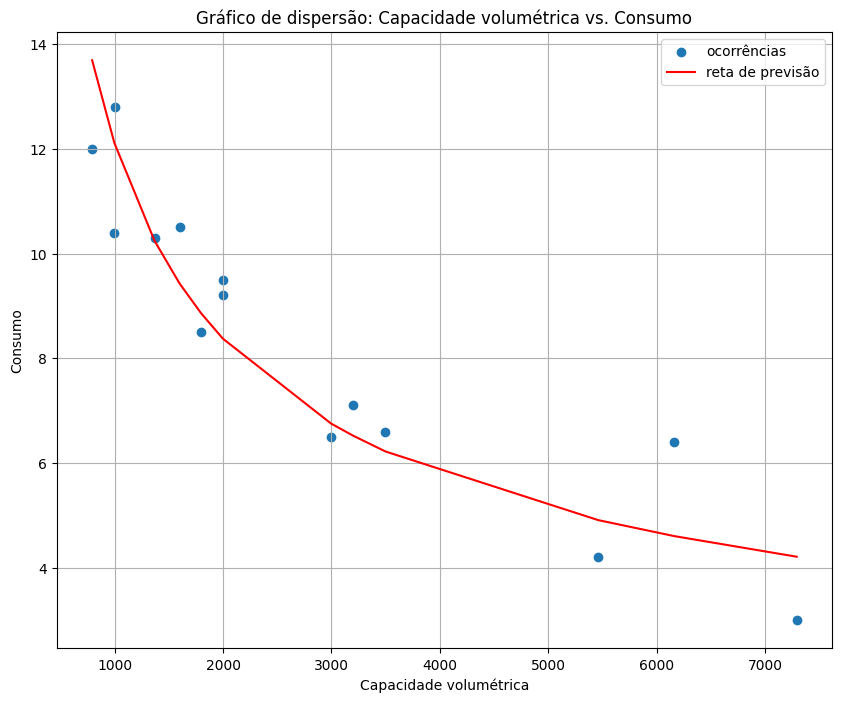

In [115]:
# Carregar dataset
df = pd.read_csv('data/cars_vertical.csv', delimiter=';', encoding='utf-8')

# Selecionar features e target
x = df[['cap_vol']]
vtx = np.log(x)

y = df[['consumo']]
vty = np.log(y)

# Separar train/test
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 1, train_size = 0.8)
    
# Treinar modelo
modelo_linearizado = LinearRegression().fit(vtx, vty)

# Prever valores
yhat = modelo_linearizado.predict(vtx)
    
# Parâmetros da reta
coeficiente_linear = modelo_linearizado.intercept_
coeficiente_angular = modelo_linearizado.coef_

# Coeficiente de determinação
r2 = modelo_linearizado.score(vtx, vty)
    
# Cálculo de erros
MAE = mean_absolute_error(np.exp(vty), np.exp(yhat))
MSE = mean_squared_error(np.exp(vty), np.exp(yhat))
RMSE = np.sqrt(MSE)

# Visualização dos resultados
plt.figure(figsize=(10, 8))
plt.scatter(x, np.exp(vty), label = 'ocorrências')
plt.plot(x, np.exp(yhat), color = 'red', label = 'reta de previsão')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo')
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Consumo')
plt.legend(loc="best")
plt.grid(True)
plt.show();

#print('Regressão linearizada Sklearn')
#print("MAE = {:0.4f}".format(MAE))
#print("MSE = {:0.4f}".format(MSE))
#print("RMSE = {:0.4f}".format(RMSE))
#print(f'Coeficiente linear: {coeficiente_linear}')
#print(f'Coeficiente angular: {coeficiente_angular}')
#print(f'Coef. Determinação: {r2}')

### Regressão logística 

##### Statsmodel

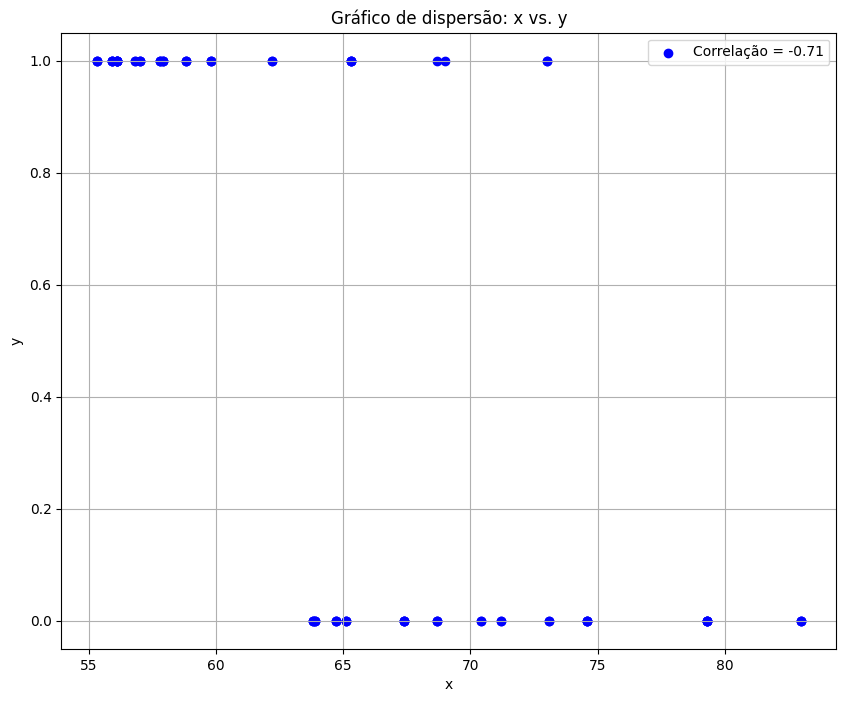

In [116]:
# Criar DataFrame I
x = [55.3,55.3,55.3,55.9,55.9,55.9,55.9,56.1,56.1,56.1,56.1,56.1,56.1,56.8,
     56.8,57.0,57.0,57.0,57.8,57.8,57.8,57.9,57.9,57.9,58.8,58.8,58.8,59.8,
     59.8,59.8,62.2,62.2,65.3,65.3,65.3,65.3,68.7,69.0,73.0,73.0,63.8,63.8,
     63.8,63.9,63.9,63.9,64.7,64.7,64.7,65.1,65.1,65.1,67.4,67.4,67.4,67.4,
     68.7,68.7,68.7,70.4,70.4,71.2,71.2,73.1,73.1,74.6,74.6,74.6,74.6,79.3,
     79.3,79.3,79.3,79.3,83.0,83.0,83.0]
y = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
     1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
     0,0,0,0,0,0,0]
df = pd.DataFrame(list(zip(x, y)), columns =['x', 'y'])

# Selecionar atributos
x = df['x']
y = df['y']

# Visualização dos dados
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color = 'blue', marker = 'o', label=f'Correlação = {np.round(np.corrcoef(x, y)[0,1], 2)}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dispersão: x vs. y')
plt.legend(loc='best')
plt.grid(True)
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Optimization terminated successfully.
         Current function value: 0.353003
         Iterations 7


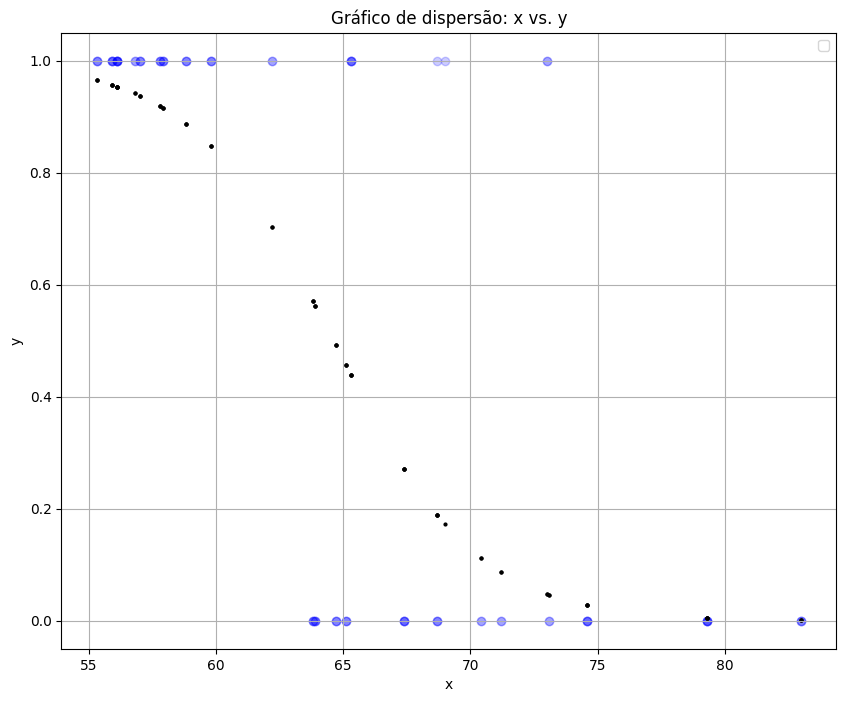

In [117]:
# Treinar modelo logístico
x_ = sm.add_constant(x)
modelo_logistico = sm.Logit(y, x_).fit()

# Valores previstos pelo modelo logístico
yhat = modelo_logistico.predict(x_)  
yhat_round = list(map(round, yhat))

# Matriz de confusão
cm = confusion_matrix(y, yhat_round)

# Acurácia
acc = accuracy_score(y, yhat_round)

# Visualização dos dados
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color = 'blue', alpha=0.20)
plt.scatter(x, yhat, color = 'black', s=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dispersão: x vs. y')
plt.legend(loc='best')
plt.grid(True)
plt.show();

#print(f'Matriz de confusão: {cm}')
#print(f'Teste de acurácia: {acc}')
#print(modelo_logistico.summary())

In [118]:
# Criar DataFrame II
x1 = [1.80, 1.65, 2.70, 3.67, 1.41, 1.76, 2.10, 2.10, 4.57, 3.59, 8.33, 2.86, 2.58, 2.90, 3.89, 0.80, 0.60, 1.30, 0.83, 0.57, 1.44, 2.08, 1.50, 1.38, 0.94, 1.58, 1.67, 3.00, 2.21]
x2 = [2.40, 2.54, 0.84, 1.68, 2.41, 1.93, 1.77, 1.50, 2.43, 5.55, 5.58, 2.00, 3.68, 1.13, 2.49, 1.37, 1.27, 0.87, 0.97, 0.94, 1.00, 0.78, 1.03, 0.82, 1.30, 0.83, 1.05, 1.19, 0.86]
y = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
df = pd.DataFrame(list(zip(x1, x2, y)), columns =['x1', 'x2', 'y'])

# Selecionar atributos
x = df[['x1','x2']]
y = df['y']

# Treinar modelo logístico
x_ = sm.add_constant(x)
modelo_logistico = sm.Logit(y, x_).fit()

# Valores previstos pelo modelo logístico
yhat = modelo_logistico.predict(x_)  
yhat_round = list(map(round, yhat))

# Matriz de confusão
cm = confusion_matrix(y, yhat_round)

# Acurácia
acc = accuracy_score(y, yhat_round)

# Verificar correlação entre atributos
#plt.figure(figsize=(8, 4))
#sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
#plt.show();

#print(f'Matriz de confusão: {cm}')
#print(f'Teste de acurácia: {acc}')
#print(modelo_logistico.summary())

Optimization terminated successfully.
         Current function value: 0.151888
         Iterations 10


### Regressão polinomial

##### Statsmodel

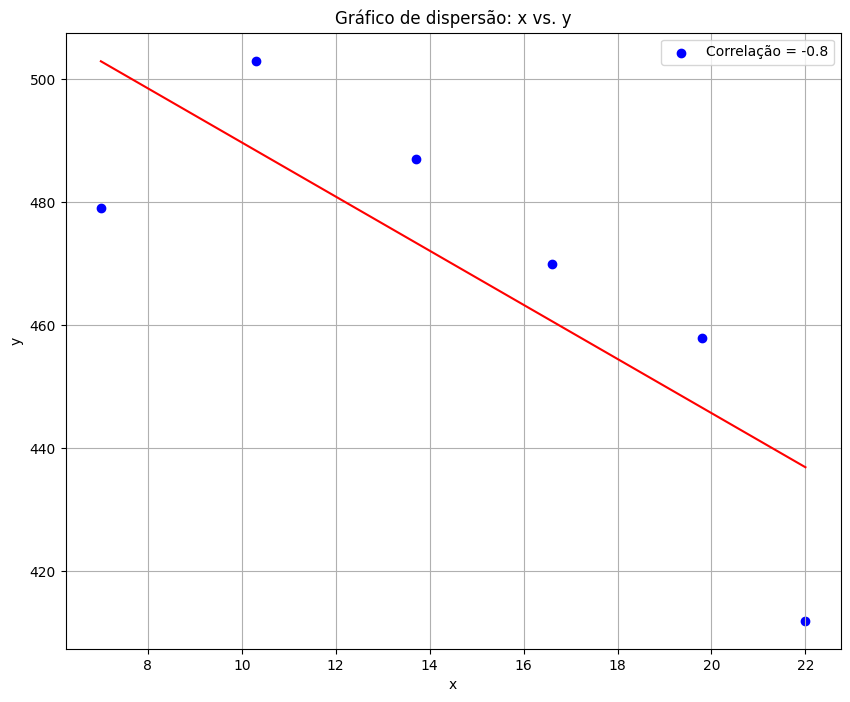

In [119]:
# Criar DataFrame
x = [7,10.3,13.7,16.6,19.8,22]
y = [479,503,487,470,458,412]
df = pd.DataFrame(list(zip(x, y)), columns =['x', 'y'])

# Selecionar atributos
x = df['x']
y = df['y']

# Treinar modelo linear
x_ = sm.add_constant(x)
modelo_linear = sm.OLS(y, x_).fit()      

# Valores previstos pelo modelo linear
yhat = modelo_linear.predict(x_)  

# Visualização dos dados
plt.figure(figsize=(10, 8))
plt.scatter(x_['x'], y, color = 'blue', marker = 'o', label=f'Correlação = {np.round(np.corrcoef(x, y)[0,1], 2)}')
plt.plot(x_['x'], yhat, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dispersão: x vs. y')
plt.legend(loc='best')
plt.grid(True)
plt.show();

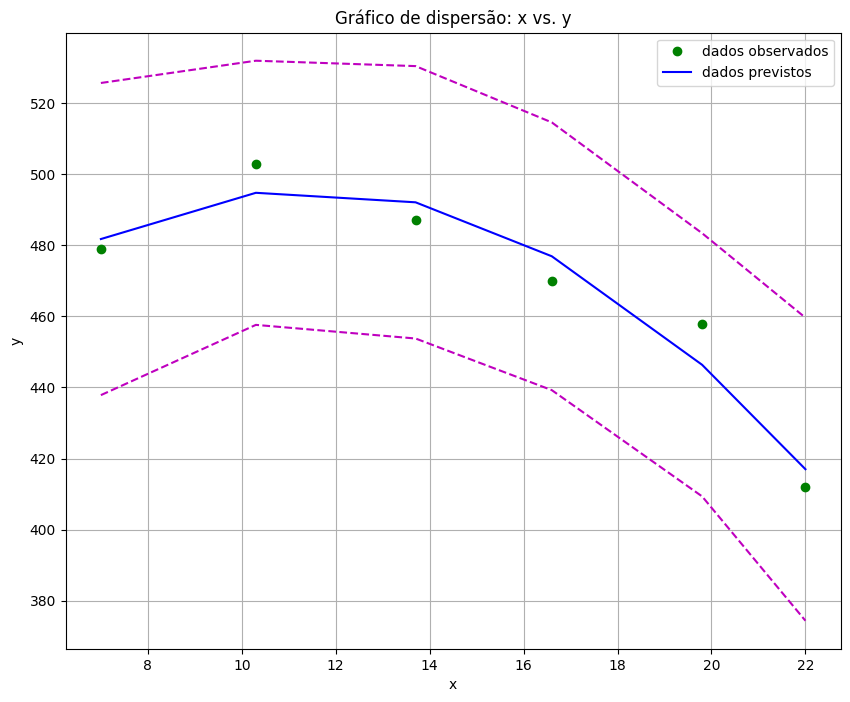

In [120]:
# Selecionar constante
x_ = sm.add_constant(x)

# Definir o grau do polinômio
polynomial_features = PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x_)

# Selecionar colunas (varia de acordo com o grau do polinômio)
xp = xp[:,3:6]

# Modelo regressão polinomial
modelo_polinomial = sm.OLS(y, xp).fit()
yhat = modelo_polinomial.predict(xp) 

# Obter parâmetros da reta
b = modelo_polinomial.params
b0 = b[0]        
b1 = b[1] 
b2 = b[2]       

# Obter parâmetros do desvio padrão
sb = modelo_polinomial.bse       
sb0 = sb[0]          
sb1 = sb[1]       
sb2 = sb[2] 

# Coeficiente de determinação
r2 = modelo_polinomial.rsquared
r2adj = modelo_polinomial.rsquared_adj

# Parâmetros considerando intervalo de confiança de 95%
a = modelo_polinomial.conf_int(alpha=0.05, cols=None)

# Obter o intervalo de previsão I
pred_ols = modelo_polinomial.get_prediction()
iv_l = pred_ols.summary_frame()['obs_ci_lower']
iv_u = pred_ols.summary_frame()['obs_ci_upper']

# Obter o intervalo de previsão II
#_, upper,lower = wls_prediction_std(modelo_polinomial)
#plt.plot(x_['x'],upper,'--',label="Maior")
#plt.plot(x_['x'],lower,'--',label="Menor")

# Visualização dos resultados
plt.figure(figsize=(10, 8))
plt.plot(x_['x'], y, 'go', label='dados observados')
plt.plot(x_['x'], yhat, 'b-', label='dados previstos')
plt.plot(x_['x'], iv_u, 'm--')
plt.plot(x_['x'], iv_l, 'm--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dispersão: x vs. y')
plt.legend(loc="best")
plt.grid(True)
plt.show();

#print(f'Parâmetros:\nb0: {b0} / b1: {b1} / b2: {b2}\n')
#print(f'Desvio padrão:\nsb0: {sb0} / sb1: {sb1} / sb2: {sb2}\n')
#print(f'Coeficiente de determinação:\nR2: {r2} / R2_adj: {r2adj}\n')
#print(f'Parâmetros para intervalo de confiança 95%:\n{a}\n')
#print(f'Valores previstos:\n{yhat}\n')
#print(f'Valores limite inferior:\n{iv_l}\n')
#print(f'Valores limite superior:\n{iv_u}\n')
#print(modelo_polinomial.summary())

##### Sklearn

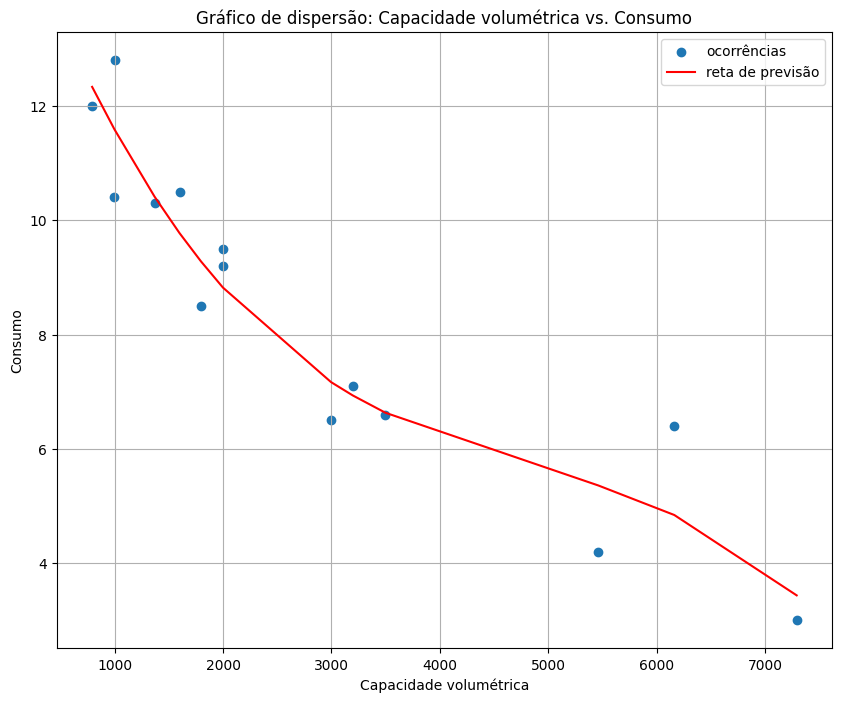

In [121]:
# Carregar dataset
df = pd.read_csv('data/cars_vertical.csv', delimiter=';', encoding='utf-8')

# Selecionar features e target
x = df[['cap_vol']].values

y = df[['consumo']].values

# Separar train/test
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 1, train_size = 0.8)

# Obter polinômio
att = PolynomialFeatures(degree=3)
xpol = att.fit_transform(x)

# Treinar modelo
modelo_polinomial = LinearRegression().fit(xpol, y)

# Prever valores
yhat = modelo_polinomial.predict(xpol)
    
# Parâmetros da reta
coeficiente_linear = modelo_polinomial.intercept_
coeficiente_angular = modelo_polinomial.coef_

# Coeficiente de determinação
r2 = modelo_polinomial.score(xpol, y)
    
# Cálculo de erros
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(vty, yhat)
RMSE = np.sqrt(MSE)

# Visualização dos resultados
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label = 'ocorrências')
plt.plot(x, yhat, color = 'red', label = 'reta de previsão')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo')
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Consumo')
plt.legend(loc="best")
plt.grid(True)
plt.show();

#print('Regressão polinomial Sklearn')
#print("MAE = {:0.4f}".format(MAE))
#print("MSE = {:0.4f}".format(MSE))
#print("RMSE = {:0.4f}".format(RMSE))
#print(f'Coeficiente linear: {coeficiente_linear}')
#print(f'Coeficiente angular: {coeficiente_angular}')
#print(f'Coef. Determinação: {r2}')

### Regressão múltipla

##### Statsmodel

In [122]:
# Criar DataFrame I
x1 = [2.04, 2.04, 3.06, 3.06, 4.08, 4.08, 2.06, 2.06, 3.08, 3.08, 4.11, 4.11, 2.01, 3.02, 4.03]
x2 = [3.55, 6.07, 3.55, 6.07, 3.55, 6.16, 3.62, 6.16, 3.62, 5.89, 3.62, 5.89, 6.18, 6.18, 6.18]
x3 = np.multiply(x1, x2)
y = [3.11, 3.26, 3.89, 10.25, 3.11, 13.48, 3.94, 3.53, 3.36, 6.49, 2.72, 12.48, 2.82, 5.19, 8.04]
df = pd.DataFrame(list(zip(x1, x2, x3, y)), columns =['x1', 'x2', 'x3', 'y'])

# Treinar modelo
modelo_multi = smf.ols('y ~ x1 + x2 + x3', data = df).fit()

# Valores previstos pelo modelo
yhat = modelo_multi.predict()  

b = modelo_multi.params
b0 = b[0]
b1 = b[1]
b2 = b[2]
b3 = b[3]

#print('y = {0}  {1} x1 + {2} x2 + {3} x1x2 '.format(b0, b1, b2, b3))
#print(modelo_multi.summary())

In [123]:
# Criar DataFrame II
x1 = [2.04, 2.04, 3.06, 3.06, 4.08, 4.08, 2.06, 2.06, 3.08, 3.08, 4.11, 4.11, 2.01, 3.02, 4.03]
x2 = [3.55, 6.07, 3.55, 6.07, 3.55, 6.16, 3.62, 6.16, 3.62, 5.89, 3.62, 5.89, 6.18, 6.18, 6.18]
x3 = np.multiply(x1, x2)
x4 = np.multiply(x2, x2)
x5 = np.multiply(x1, x2)
y = [3.11, 3.26, 3.89, 10.25, 3.11, 13.48, 3.94, 3.53, 3.36, 6.49, 2.72, 12.48, 2.82, 5.19, 8.04]
df = pd.DataFrame(list(zip(x1, x2, x3, x4, x5, y)), columns =['x1', 'x2', 'x3', 'x4', 'x5', 'y'])

# Treinar modelo
modelo_multi = smf.ols('y ~ x1 + x2 + x3 + x4 + x5', data = df).fit() 

# Valores previstos pelo modelo
yhat = modelo_multi.predict()

# Obter parâmetros
b = modelo_multi.params
b0 = b[0]
b1 = b[1]
b2 = b[2]
b3 = b[3]
b4 = b[4]
b5 = b[5]

#print('y = {0}  {1} x1 + {2} x2 + {3} x1^2 {4} x2^2  + {5} x1x2 '.format(b0, b1, b2, b3, b4, b5))
#print(modelo_multi.summary())

In [124]:
# Criar DataFrame III
x1 = [0.93, 1.11, 0.93, 1.11, 0.93, 1.11, 0.93, 1.11, 1.02, 1.02, 1.02, 1.02]
x2 = [1.00, 1.00, 1.00, 1.00, 1.40, 1.40, 1.40, 1.40, 1.18, 1.18, 1.18, 1.18]
x3 = [0.20, 0.20, 0.50, 0.50, 0.20, 0.20, 0.50, 0.50, 0.31, 0.31, 0.31, 0.31]
y = [32.95, 38.72, 35.20, 38.72, 32.27, 39.71, 33.67, 38.72, 35.20, 33.67, 36.02, 32.27]

# Utilizar log log
vtx1 = np.log(x1)
vtx2 = np.log(x2)
vtx3= np.log(x3)
vty = np.log(y)

# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(vtx1, vtx2, vtx3, vty)), columns =['vtx1', 'vtx2', 'vtx3', 'vty'])

# Treinar modelo
modelo_multi = smf.ols('vty ~ vtx1 + vtx2 + vtx3', data = df).fit() 

# Valores previstos pelo modelo
yhat = modelo_multi.predict()

# Obter parâmetros
b = modelo_multi.params
b0 = b[0]
b1 = b[1]
b2 = b[2]
b3 = b[3]

#print('y = {0}  {1} x1 + {2} x2 + {3} x3'.format(b0, b1, b2, b3))
#print(modelo_multi.summary())

##### Sklearn

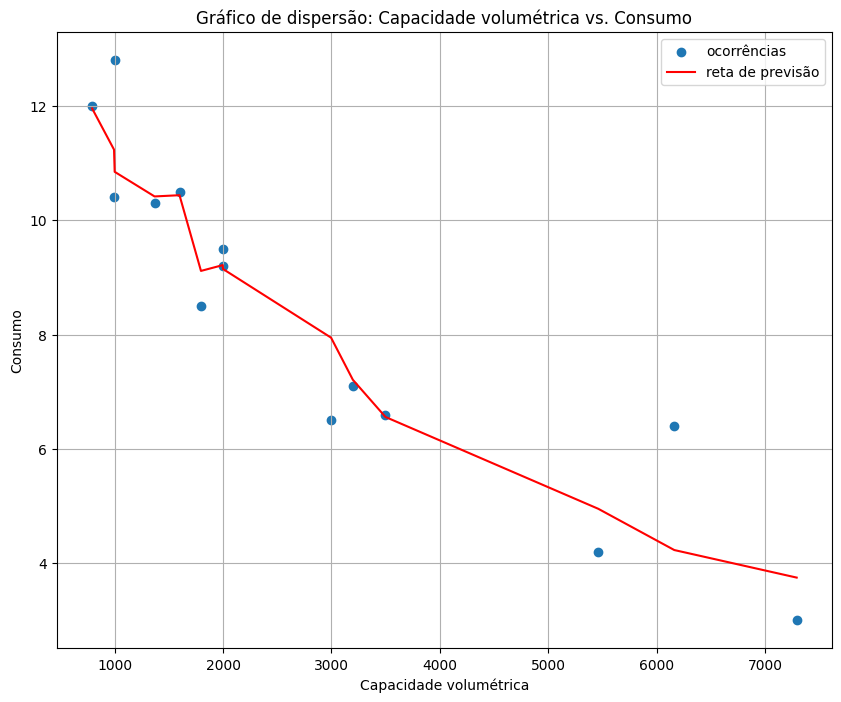

In [125]:
# Carregar dataset
df = pd.read_csv('data/cars_vertical.csv', delimiter=';', encoding='utf-8')

# Selecionar features e target
x = df[['cap_vol', 'power', 'weight']]
y = df[['consumo']]

# Separar train/test
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 1, train_size = 0.8)
    
# Treinar modelo
modelo_linear = LinearRegression().fit(x, y)

# Prever valores
yhat = modelo_linear.predict(x)
    
# Parâmetros da reta
coeficiente_linear = modelo_linear.intercept_
coeficiente_angular = modelo_linear.coef_

# Coeficiente de determinação
r2 = modelo_linear.score(x, y)
    
# Cálculo de erros
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(y, yhat)
RMSE = np.sqrt(MSE)

# Visualização dos resultados
plt.figure(figsize=(10, 8))
plt.scatter(x['cap_vol'], y, label = 'ocorrências')
plt.plot(x['cap_vol'], yhat, color = 'red', label = 'reta de previsão')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo')
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Consumo')
plt.legend(loc="best")
plt.grid(True)
plt.show();

#print('Regressão múltipla Sklearn')
#print("MAE = {:0.4f}".format(MAE))
#print("MSE = {:0.4f}".format(MSE))
#print("RMSE = {:0.4f}".format(RMSE))
#print(f'Coeficiente linear: {coeficiente_linear}')
#print(f'Coeficiente angular: {coeficiente_angular}')
#print(f'Coef. Determinação: {r2}')